## Rời rạc hóa sử dụng kiến thức chuyên ngành (Domain knowledge)

Thông thường, khi thiết kế các biến trong một cơ sở kinh doanh, các chuyên gia kinh doanh xác định các khoảng mà họ nghĩ rằng biến đó nên được chia sao cho phù hợp với doanh nghiệp. Ví dụ điển hình là rời rạc hóa biến Age và Income.

Ví dụ: Income (thu nhập) thường bị giới hạn ở một giá trị tối đa nhất định và tất cả thu nhập trên giá trị đó đều rơi vào bucket cuối. Với Age, nó thường được chia thành các nhóm nhất định theo nhu cầu kinh doanh, ví dụ chia thành 0-21 (cho người vị thành niên), 20-30 (cho thanh niên), 30-40, 40-60 và > 60 (dành cho người đã nghỉ hưu hoặc sắp về hưu) thường gặp nhất.

## Trong bản mô phỏng này

Chúng ta sẽ tìm hiểu cách chia một biến thành các bucket đã xác định trước sử dụng tập dữ liệu sách Titanic và loan book.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# load tập dữ liệu Titanic

data = pd.read_csv('titanic.csv',
                   usecols=['age', 'survived'])

data.head()

,survived,age
0,1,29.0000
1,1,0.9167
2,0,2.0000
3,0,30.0000
4,0,25.0000


Biến age chứa dữ liệu bị khuyết, chúng ta sẽ điền vào bằng cách trích xuất mẫu ngẫu nhiên của biến.

In [3]:
## Yêu cầu 1:
## VIẾT CODE Ở ĐÂY:
def impute_na(data, variable):
    df = data.copy()

    # lấy mẫu ngẫu nhiên
    df[variable+'_random'] = df[variable]

    # trích xuất mẫu ngẫu nhiên để điền na
    random_sample = data[variable].dropna().sample(
        df[variable].isnull().sum(), random_state=0)

    # pandas cần có các index tương tự để hợp nhất các tập dữ liệu
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample

    return df[variable+'_random']

<details><summary> Gợi ý </summary>

[sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)

</details>

In [4]:
# hãy điền giá trị bị khuyết
data['age'] = impute_na(data, 'age')

In [5]:
# hãy chia Age thành các bucket mà chúng ta đã mô tả ở cell giới thiệu
# của notebook này

# ranh giới bucket
buckets = [0, 20, 40, 60, 1000]

# nhãn bucket 
labels = ['0-20', '20-40', '40-60', '>60']

# rời rạc hóa
## Yêu cầu 2:
## VIẾT CODE Ở ĐÂY:
data['Age_buckets_labels'] = pd.cut(
    data['age'], bins=buckets, labels=labels, include_lowest=True)

data['Age_buckets'] = pd.cut(data['age'], bins=buckets, include_lowest=True)

data.head()

,survived,age,Age_buckets_labels,Age_buckets
0,1,29.0000,20-40,"(20.0, 40.0]"
1,1,0.9167,0-20,"(-0.001, 20.0]"
2,0,2.0000,0-20,"(-0.001, 20.0]"
3,0,30.0000,20-40,"(20.0, 40.0]"
4,0,25.0000,20-40,"(20.0, 40.0]"


<details><summary> Gợi ý </summary>

[cut()](https://pandas.pydata.org/docs/reference/api/pandas.cut.html)

</details>

In [6]:
data.tail()

,survived,age,Age_buckets_labels,Age_buckets
1304,0,14.5,0-20,"(-0.001, 20.0]"
1305,0,39.0,20-40,"(20.0, 40.0]"
1306,0,26.5,20-40,"(20.0, 40.0]"
1307,0,27.0,20-40,"(20.0, 40.0]"
1308,0,29.0,20-40,"(20.0, 40.0]"


Ở trên, chúng ta thấy các bucket đặt từng quan sát của age. Ví dụ: age=14 được xếp vào bucket 0-20.

Hãy khám phá số lượng quan sát và tỷ lệ sống sót trên mỗi bucket sau phương pháp rời rạc hóa tùy ý này. 

<AxesSubplot: xlabel='Age_buckets_labels'>

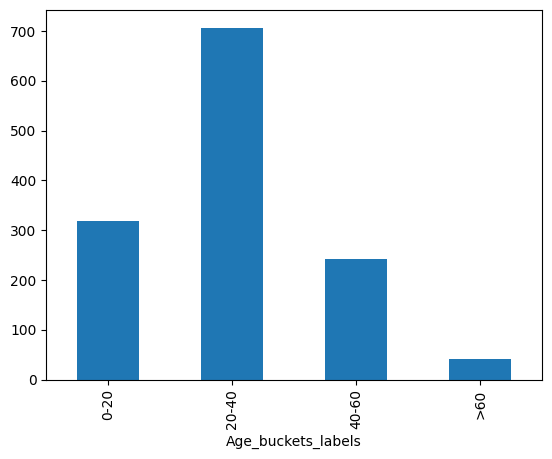

In [7]:
# số hành khách ở mỗi bucket
## Yêu cầu 3:
## VIẾT CODE Ở ĐÂY:
data.groupby('Age_buckets_labels')['age'].count().plot.bar()

<details><summary> Gợi ý </summary>

[bar()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)

</details>

<AxesSubplot: xlabel='Age_buckets_labels'>

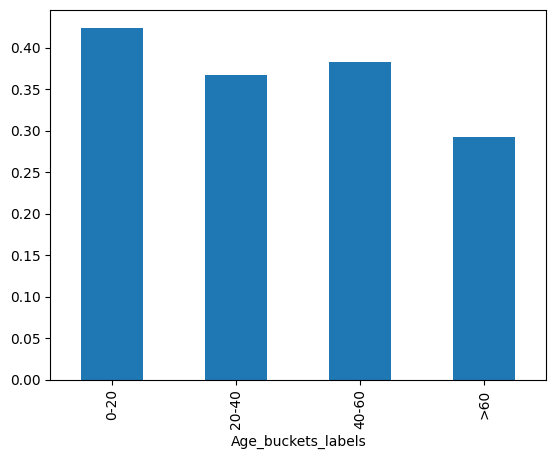

In [8]:
# tỷ lệ sống sót ở mỗi age bucket
## Yêu cầu 4:
## VIẾT CODE Ở ĐÂY:
data.groupby('Age_buckets_labels')['survived'].mean().plot.bar()

<details><summary> Gợi ý </summary>

[bar()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)

</details>

### Peer to peer

Hãy khám phá rời rạc hóa sử dụng kiến thức chuyên ngành trong một tình huống kinh doanh khác. Chúng ta sẽ sử dụng sổ cho vay từ công ty cho vay ngang hàng. Tập dữ liệu này chứa thông tin về các khoản cho vay và các đặc điểm tài chính của những người đi vay đó cũng như hiệu suất cho vay.

In [ ]:
# Chỉ load thu nhập do người đi vay kê khai để biểu diễn
############# KHÔNG THẤY LINK TẢI VỀ DỮ LIỆU TRONG BÀI LAB
data = pd.read_csv('loan.csv', usecols=['income'])

data.head()

In [ ]:
data['income'].describe()

count    1.000000e+04
mean     7.157229e+04
std      5.286105e+04
min      0.000000e+00
25%      4.365000e+04
50%      6.045000e+04
75%      8.536000e+04
max      2.185000e+06
Name: income, dtype: float64

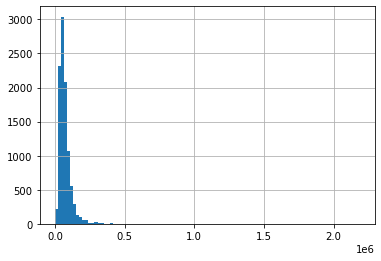

In [ ]:
# hãy kiểm tra phân phối của Income
## Yêu cầu 5:
## VIẾT CODE Ở ĐÂY:
data['income'].hist(bins=100)

<details><summary> Gợi ý </summary>

[hist()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

</details>

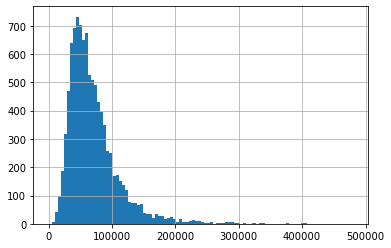

In [ ]:
# giờ hãy xem chi tiết thu nhập thấp hơn 
## Yêu cầu 6:
## VIẾT CODE Ở ĐÂY:
data[data['income']<500000]['income'].hist(bins=100)

<details><summary> Gợi ý </summary>

[hist()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

</details>

Có thể thấy rằng phần lớn tập hợp có thu nhập dưới 150,000 nên chúng ta sẽ cần tạo một giới hạn ở đó.

In [ ]:
# bây giờ hãy chia thành các bucket tùy ý, giả sử chúng có ý nghĩa kinh doanh

# khoảng bucket
buckets = [0, 45000, 65000, 90000, 150000, 1e10]

# nhãn bucket
labels = ['0-45k', '45-65k', '65-90k', '90-150k', '>150k']

# rời rạc hóa
## Yêu cầu 7:
## VIẾT CODE Ở ĐÂY:
data['Income_buckets'] = pd.cut(
    data['income'], bins=buckets, labels=labels, include_lowest=True)

data.head()

,income,Income_buckets
0,84600.0,65-90k
1,102000.0,90-150k
2,69840.0,65-90k
3,100386.0,90-150k
4,95040.0,90-150k


<details><summary> Gợi ý </summary>

[cut()](https://pandas.pydata.org/docs/reference/api/pandas.cut.html)

</details>

In [ ]:
data.tail()

,income,Income_buckets
9995,98000.0,90-150k
9996,36270.0,0-45k
9997,52250.0,45-65k
9998,80040.0,65-90k
9999,72000.0,65-90k


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

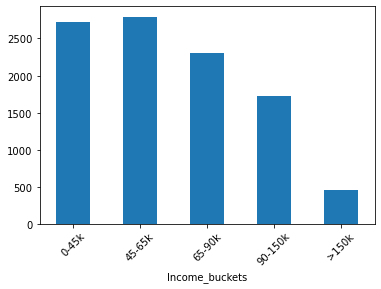

In [ ]:
## Yêu cầu 8:
## VIẾT CODE Ở ĐÂY:
data.groupby(['Income_buckets'])['income'].count().plot.bar()
plt.xticks(rotation=45)

<details><summary> Gợi ý </summary>

[bar()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)

</details>

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

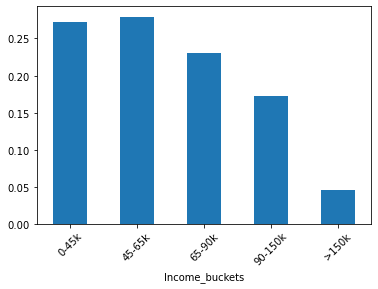

In [ ]:
## Yêu cầu 9:
## VIẾT CODE Ở ĐÂY:
(data.groupby(['Income_buckets'])['income'].count()/len(data)).plot.bar()
plt.xticks(rotation=45)

<details><summary> Gợi ý </summary>

[bar()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)

</details>

Chúng ta đã nắm bắt được số lượng người đi vay gần như bằng nhau ở mỗi bucket trong 3 bucket đầu tiên và thấy rõ ràng rằng có một tỷ lệ phần trăm nhỏ hơn của các khoản vay đã được giải ngân cho những người có thu nhập cao.

**Lưu ý**

Chúng ta có thể thực hiện rời rạc hóa tùy ý với Feature-engine, lớp ArbitraryDiscretiser. Tìm hiểu thêm [ví dụ sau](https://github.com/solegalli/feature_engine/blob/master/examples/discretisation/ArbitraryDiscretiser.ipynb)
